Nama : Zulfikri

Email : zulfikri263@gmail.com

Alamat : Jalan Mustafa Yatim, Kota Pekanbaru, Riau

**Proyek Akhir : Image Classification Model Deployment**

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [6]:
pip install split_folders

In [2]:
 !pip install -q kaggle

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /content/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [01:03<00:00, 78.5MB/s]
100% 3.58G/3.58G [01:03<00:00, 60.4MB/s]


In [7]:
import zipfile,os
import splitfolders
local_zip = '/content/fruits-fresh-and-rotten-for-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
base_dir = '/content/dataset/dataset'
test_dir = '/content/dataset/dataset/test'
train_dir = '/content/dataset/dataset/train'
validation_dir = os.path.join(base_dir, 'validation')

train_frapples_dir = os.path.join(train_dir, 'frapples')
train_frbanana_dir = os.path.join(train_dir, 'frbanana')
train_froranges_dir = os.path.join(train_dir, 'froranges')
train_rtapples_dir = os.path.join(train_dir, 'rtapples')
train_rtbanana_dir = os.path.join(train_dir, 'rtbanana')
train_rtoranges_dir = os.path.join(train_dir, 'rtoranges')
 
validation_frapples_dir = os.path.join(validation_dir, 'frapples')
validation_frbanana_dir = os.path.join(validation_dir, 'frbanana')
validation_froranges_dir = os.path.join(validation_dir, 'froranges')
validation_rtapples_dir = os.path.join(validation_dir, 'rtapples')
validation_rtbanana_dir = os.path.join(validation_dir, 'rtbanana')
validation_rtoranges_dir = os.path.join(validation_dir, 'rtoranges')

In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    width_shift_range = 0.15,
                    height_shift_range = 0.15,
                    zoom_range = 0.15,
                    fill_mode = 'nearest',
                    validation_split= 0.2
                    )
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    width_shift_range = 0.15,
                    height_shift_range = 0.15,
                    zoom_range = 0.15,
                    fill_mode = 'nearest',
                    validation_split= 0.2
                    )

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(200, 200),  
        batch_size= 32, 
        class_mode='categorical'
        )
 
validation_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(200, 200), 
        batch_size= 32, 
        class_mode='categorical'
        )

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [22]:
class testCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy') > 0.92):
      print("\nAchive 92% accuracy")
      self.model.stop_training = True
callbacks = testCallback()

In [23]:
final = model.fit(
      train_generator, 
      epochs=100,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2,
      callbacks = [callbacks])

Epoch 1/100
341/341 - 149s - loss: 0.7624 - accuracy: 0.7146 - val_loss: 0.3106 - val_accuracy: 0.8750
Epoch 2/100
341/341 - 148s - loss: 0.3800 - accuracy: 0.8606 - val_loss: 0.2752 - val_accuracy: 0.8813
Epoch 3/100
341/341 - 149s - loss: 0.2979 - accuracy: 0.8916 - val_loss: 0.2629 - val_accuracy: 0.9312
Epoch 4/100
341/341 - 145s - loss: 0.2508 - accuracy: 0.9092 - val_loss: 0.1838 - val_accuracy: 0.9375
Epoch 5/100
341/341 - 145s - loss: 0.2076 - accuracy: 0.9237 - val_loss: 0.1719 - val_accuracy: 0.9500

Achive 92% accuracy


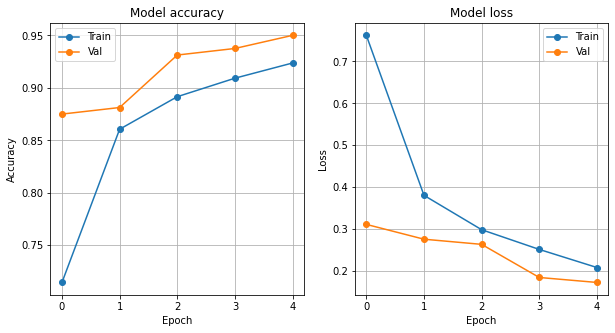

In [24]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(final.history['accuracy'], 'o-')
plt.plot(final.history['val_accuracy'], 'o-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(final.history['loss'], 'o-')
plt.plot(final.history['val_loss'], 'o-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='best')
plt.grid()


plt.show()

In [25]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp6ny6c10y/assets


In [26]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)